In [1]:
import pandas as pd
from tqdm import tqdm
from PIL import Image
import numpy as np
from tensorflow import keras
import utils
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/labels/boyner.csv")

In [3]:
clean_dict = {'brand' : [], 'category': [], 'subcategory': [], 
              'price' : [], 'name': [], 'imagepath':[], 'imageurl':[], 
              'producturl': []}

for i, row in tqdm(df.iterrows()):
    info = eval(row['productcategory'])
    if len(info) != 4 :
        # print("Skipped", info)
        continue
    assert len(info) == 4, "%s"%str(info)
    _, brand, cat, subcat = info
    clean_dict['brand'].append(brand)
    clean_dict['category'].append(cat)
    clean_dict['subcategory'].append(subcat)
    clean_dict['price'].append(row['productprice'])
    clean_dict['name'].append(row['productname'])
    clean_dict['imagepath'].append(row['local_path'])
    clean_dict['imageurl'].append(row['productimageurl'])
    clean_dict['producturl'].append(row['producturl'])

99986it [00:15, 6587.84it/s]


In [4]:
df = pd.DataFrame(clean_dict)

In [5]:
df

,brand,category,subcategory,price,name,imagepath,imageurl,producturl
0,U.S. Polo Assn.,Giyim,Kazak,109.95,U.S. Polo Assn. V Yaka Kazak,data/boyner_images/0.jpg,https://statics.boyner.com.tr/productimages/52...,https://www.boyner.com.tr/u.s.-polo-assn.-kaza...
1,Caterpillar,Ayakkabı,Bot,199.00,Caterpillar Colorado Bot Bot,data/boyner_images/1.jpg,https://statics.boyner.com.tr/productimages/51...,https://www.boyner.com.tr/caterpillar-bot-4589...
2,Limon,Giyim,Gömlek,27.50,Limon Gömlek,data/boyner_images/2.jpg,https://statics.boyner.com.tr/productimages/51...,https://www.boyner.com.tr/limon-gomlek-659425-...
3,The North Face,Giyim,Mont,799.00,The North Face Şişme Mont,data/boyner_images/3.jpg,https://statics.boyner.com.tr/productimages/52...,https://www.boyner.com.tr/the-north-face-mont-...
4,Harley Davidson,Ayakkabı,Bot,279.30,Harley Davidson Deri Erkek Bot,data/boyner_images/4.jpg,https://statics.boyner.com.tr/productimages/52...,https://www.boyner.com.tr/harley-davidson-bot-...
...,...,...,...,...,...,...,...,...
99918,Boyner Evde,Dekorasyon,Mumluk,5.98,Boyner Evde Mumluk,data/boyner_images/99981.jpg,https://statics.boyner.com.tr/productimages/51...,https://www.boyner.com.tr/boyner-evde-mumluk-4...
99919,Clarks,Ayakkabı,Bot,383.92,Clarks Bot,data/boyner_images/99982.jpg,https://statics.boyner.com.tr/productimages/52...,https://www.boyner.com.tr/clarks-bot-440827-33...
99920,George Hogg,Ayakkabı,Bot,229.00,George Hogg Bot,data/boyner_images/99983.jpg,https://statics.boyner.com.tr/productimages/52...,https://www.boyner.com.tr/george-hogg-bot-6502...
99921,Black Pepper,Ayakkabı,Bot,180.00,Black Pepper Bağcıklı ve Fermuarlı Deri Bot,data/boyner_images/99984.jpg,https://statics.boyner.com.tr/mnresize/900/125...,https://www.boyner.com.tr/black-pepper-bot-661...


Number of images in 36 brands : 80543
Brands: ['Harley Davidson' 'Nike' 'Jack & Jones' 'Caterpillar' 'U.S. Polo Assn.'
 'Limon' 'Adidas' 'Dockers' 'Tommy Hilfiger' 'Fabrika' 'Lancome'
 'The North Face' 'Outlet Kadın' 'Swarovski' 'Mavi' 'Columbia' 'Network'
 'Erkek Giyim' 'Pierre Cardin' "Levi's" 'Calvin Klein' 'Outlet Erkek'
 'Beymen' 'George Hogg' 'Beymen Business' 'T-Box PL' 'Selen' 'İpekyol'
 'Wrangler' 'Boyner Evde' 'Kadın Dış Giyim' 'North Of Navy' 'Lumberjack'
 'Lee Cooper' 'Birkenstock' 'Armani']


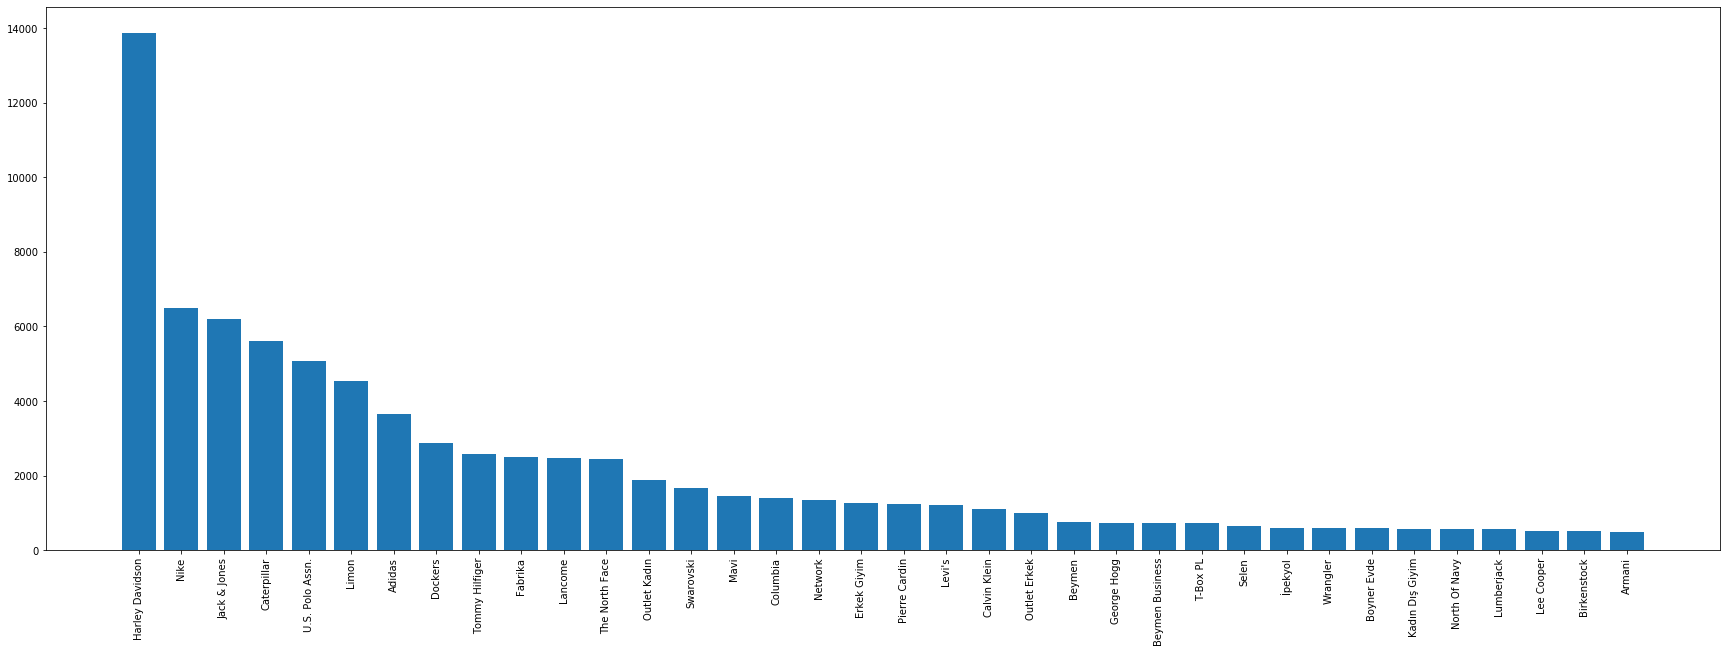

In [8]:
# Plot brands with highest number of occurrence 
top_k = 36
brands = df.brand.tolist()
unique, counts = np.unique(brands, return_counts = True)
sorted_index = np.argsort(counts)[::-1][:top_k]
top_k_counts = counts[sorted_index]
top_k_unique = unique[sorted_index]
print("Number of images in %i brands : %i"%(top_k, sum(top_k_counts)))
print("Brands:", top_k_unique)
plt.figure(figsize = (30, 10))
plt.bar(list(range(len(top_k_unique))), top_k_counts)
plt.xticks(list(range(len(top_k_unique))), list(top_k_unique), rotation = 90)
plt.show()

Number of images in 7 categories : 94380
Cats: ['Giyim' 'Ayakkabı' 'Aksesuar' 'Çanta' 'Makyaj' 'İç Giyim' 'Parfüm']


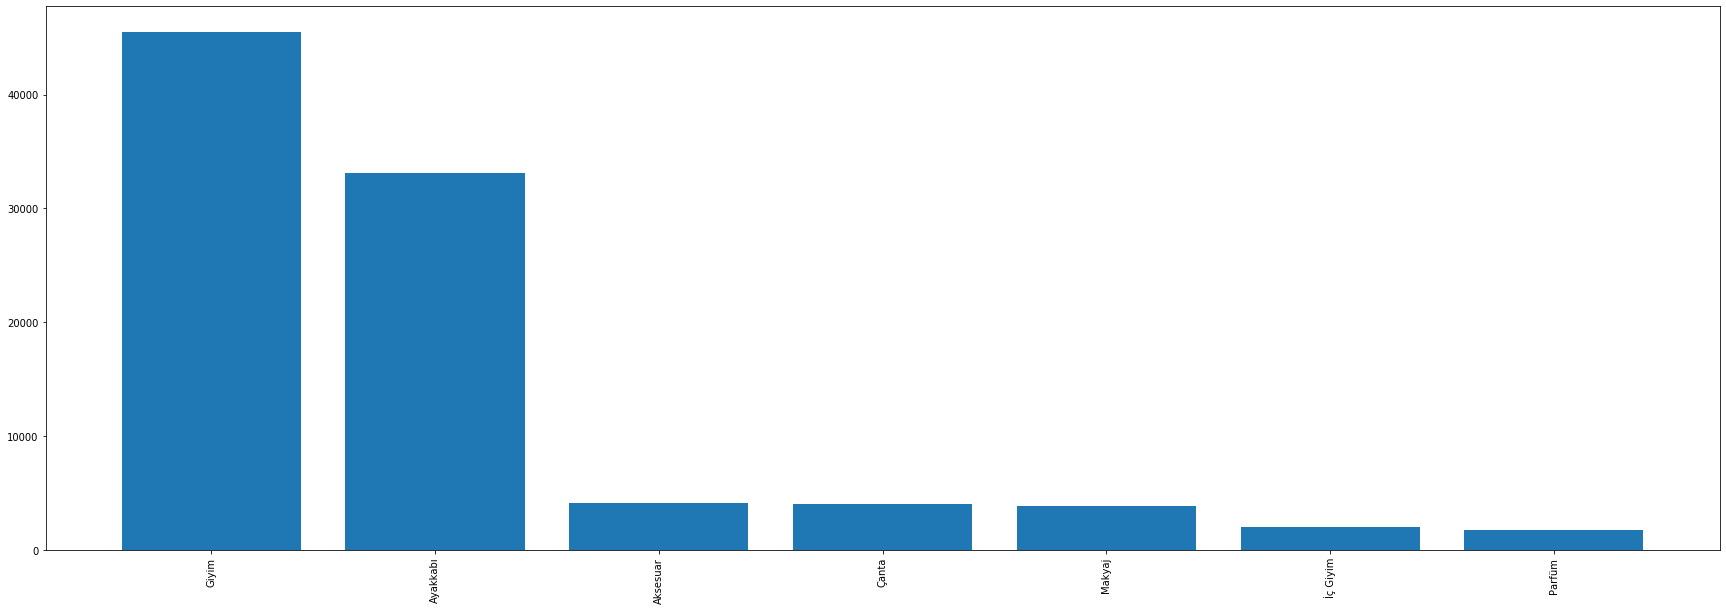

In [12]:
# Plot categories with highest number of occurrence 
top_k = 7
unique, counts = np.unique(df.category.tolist(), return_counts = True)
# sort counts
index = np.argsort(counts)[::-1]
index = index[:top_k]
top_k_counts = counts[index]
top_k_unique = unique[index]
print("Number of images in %i categories : %i"%(top_k, sum(top_k_counts)))
print("Cats:", top_k_unique)
plt.figure(figsize = (30, 10))
plt.bar(list(range(len(top_k_unique))), top_k_counts)
plt.xticks(list(range(len(top_k_unique))), list(top_k_unique), rotation = 90)
plt.show()

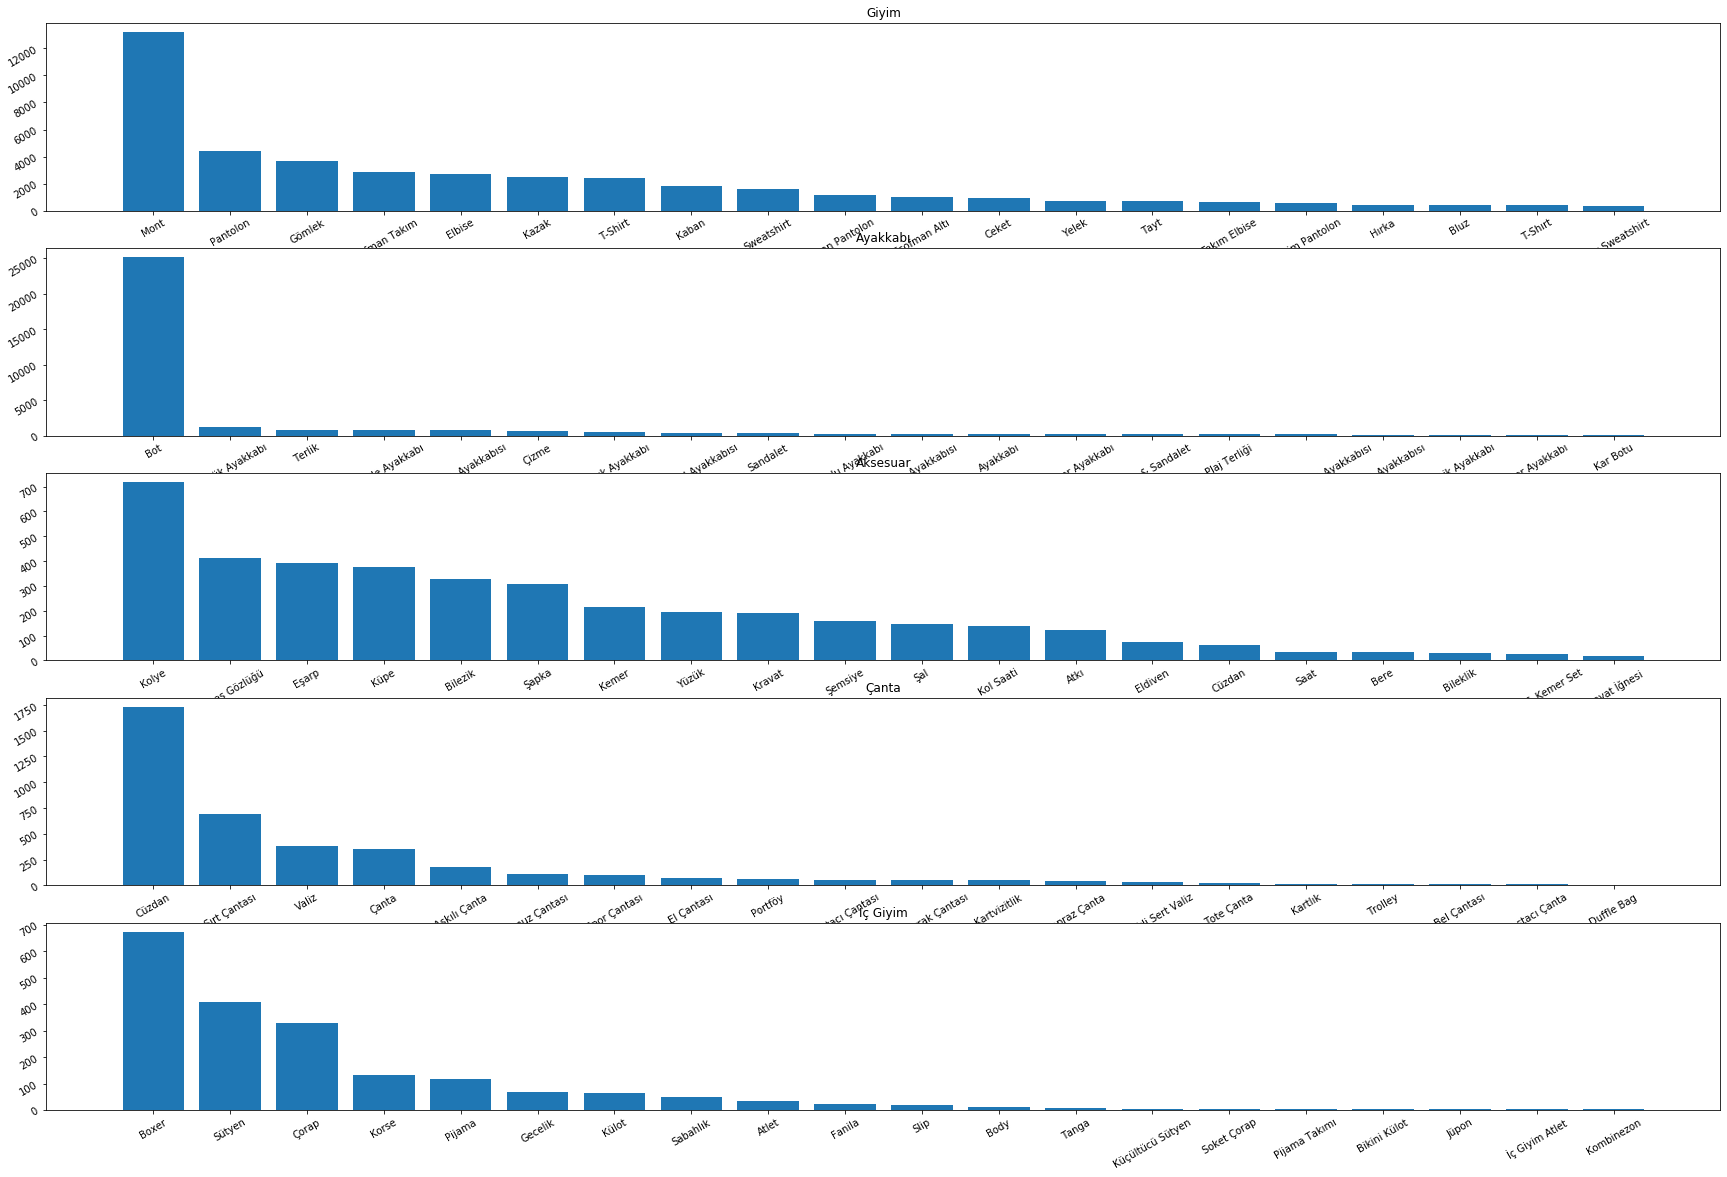

In [35]:
# Plot subcategories under giyim, ayakkabi, aksesuar, canta, and ic giyim
top_k = 20
fig, axes = plt.subplots(5, 1, figsize = (30, 20))
for i, cat in enumerate(['Giyim', 'Ayakkabı', 'Aksesuar', 'Çanta', 'İç Giyim']):
    unique, counts = np.unique(df[df['category'] == cat].subcategory.tolist(), return_counts = True)
    # sort counts
    index = np.argsort(counts)[::-1]
    index = index[:top_k]
    top_k_counts = counts[index]
    top_k_unique = unique[index]
    # print("Number of images in %i categories : %i"%(top_k, sum(top_k_counts)))
    axes[i].bar(list(range(len(top_k_unique))), top_k_counts)
    axes[i].set_xticks(list(range(len(top_k_unique))))
    axes[i].set_xticklabels(list(top_k_unique))
    axes[i].tick_params(rotation = 30)
    axes[i].set_title("%s"%cat)
plt.show()